<font color=#ffffff>

# <b>Provider Segmentation Modelling via Clustering</b>

フレンチ • 提供者のセグメンテーション!! • 2025

Two parts per step: **Theory** and **Practice**.

<font color=#ffffff>

<b>1st Mock Data Testing + Load Real Data - Sep 8, 2025 • 09:46 AM</b>

<b>2nd Real Data Clustering Models + Parameters Fine Tuning - Sep 9, 2025 • 09:09 AM</b>

<img src="https://github.com/FearlessFrench/provider-segmentation/blob/main/visuals/image.png?raw=true" width="500">

<a id="contents_table"></a>

<div style="border-radius:10px; padding: 15px; background-color:#10041c; font-size:90%; text-align:left">

## <b>Clustering Pipeline</b>

**2nd Phase - Data Modeling & Analysis**
* [Step 1 | Config](#config) 
* [Step 2 | Setup](#setup)  
* [Step 3 | Data Load (mock with numeric + categorical, or external)](#data_load)
    - [Step 3.1 | Dataset Description](#data_description)
* [Step 4 | Feature Mapping (with optional one-hot encoding)](#feature_mapping)
* [Step 5 | EDA](#eda)  
    - [Step 5.1 | Feature Visualization](#feature_visualization)
* [Step 6 | Missing Values & Casting](#missing_values)
    - [Imputation Methods Theory](#imputation_theory)
* [Step 7 | Feature Engineering](#feature_engineering)  
* [Step 8 | Feature Selection](#feature_selection)  
* [Step 9 | Outlier Handling](#outlier_handling)  
    - [Outlier Handling Theory](#outlier_theory)
* [Step 10 | Scaling](#scaling)  
    - [Step 10.1 | Compare Clustering Across Two Scalers](#compare_scalers)
* [Step 11 | PCA](#pca)
    - [Principal Component Analysis Theory](#pca_theory)
    - [Step 11.1 | 3D PCA Visualization](#pca_visualization)  
* [Step 12 | Clustering Models](#clustering_models)  
* [Step 13 | Hyperparameter Sweeps](#hyperparameter_sweeps)  
* [Step 14 | Validation Metrics](#validation_metrics)  
    - [Validation Metrics Theory](#validation_theory)
* [Step 15 | Visualization (scatter + centroids)](#visualization)  
* [Step 16 | Cluster Profiling](#cluster)
    - [Step 16.1 | Cluster Characteristic visualization](#cluster_characteristic)  
    - [Step 16.2 | Cluster Naming (business interpretation)](#cluster_naming)
* [Step 17 | Export artifacts](#export_artifacts)  
    - [Export Artifacts Theory](#export_theory)

<a id="config"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Finalize |</span><span style='color:#ffffff'> Best Parameters & Models</span></b>
⬆️ [Table of Contents](#contents_table)

For __Data Modelling and Analysis__ start at __[Step 1 | Config](#config)__ first. I've really stress-tested my segmentation pipeline... 🚀

<font color=#ffffff>

<div style="border-radius:10px; padding: 15px; background-color:#10041c; font-size:90%; text-align:left">

### <b>Best K-Means Configs</b>
```<pre>
ALGO = "kmeans"

SCALER = "robust"

APPLY_PCA = True
PCA_N_COMPONENTS = 4

OUTLIER_METHOD = "zscore"
Z_MAX = 4.0

FEATURE_SELECTION_METHOD = "univariate"
TOP_K = 12
UNIVARIATE_SCORE = "f"

Result:
{'silhouette': 0.6764421430125165, 'davies_bouldin': 0.4810081058762064, 'calinski_harabasz': 24802.478083787613}

<font color=#ffffff>

<div style="border-radius:10px; padding: 15px; background-color:#10041c; font-size:90%; text-align:left">

### <b>Best Hierarchical Clustering (Agglomerative) Configs</b>
```<pre>
ALGO = "agglo"

SCALER = "robust"

APPLY_PCA = True
PCA_N_COMPONENTS = 3

OUTLIER_METHOD = "zscore"
Z_MAX = 4.0

FEATURE_SELECTION_METHOD = "model"
TOP_K = 12
MODEL_TYPE = "rf" 

Result:
{'silhouette': 0.6672495674142601, 'davies_bouldin': 0.3956684517897449, 'calinski_harabasz': 17161.245761676128}

<font color=#ffffff>

<div style="border-radius:10px; padding: 15px; background-color:#10041c; font-size:90%; text-align:left">

### <b>Best DBSCAN Configs</b>
```<pre>
ALGO = "dbscan"

SCALER = "robust"

APPLY_PCA = True
PCA_N_COMPONENTS = 3

OUTLIER_METHOD = "zscore"
Z_MAX = 4.0

FEATURE_SELECTION_METHOD = "univariate"  
TOP_K = 12
UNIVARIATE_SCORE = "f"

Result:
eps = 1.5
min_samples = 20
clusters = 3
{'silhouette': 0.773534, 'davies_bouldin': 0.180878, 'calinski_harabasz': 9347.373039}

<font color=#ffffff>

<div style="border-radius:10px; padding: 15px; background-color: rgb(256,12,84); font-size:90%; text-align:left">

### <b>📊 Provider Segmentation Models Comparison</b>
__1) DBSCAN__ discovers the most natural clusters (highest Silhouette, lowest overlap).

__2) K-Means__ provides the clearest partitioning (highest Calinski Harabasz Index score).

__3) Agglomerative__ balances interpretability and separation.

While __Spectral__ & __GMM__ performing worse since __`provider.csv`__ data structure probably isn’t strongly suited to either __manifold clustering (spectral)__ or __probabilistic elliptical clusters (GMM)__.

| Algorithm          | Silhouette ↑ | Davies-Bouldin ↑ | Calinski-Harabasz ↑ | Business Strength                          | When to Use                                                        |
| ------------------ | ------------ | ---------------- | ------------------- | ------------------------------------------ | ------------------------------------------------------------------ |
| **DBSCAN**         | **0.77**     | **0.18**         | 9,347               | Finds “natural” groups, handles noise well | When providers are irregularly distributed, want outlier detection |
| **K-Means**        | 0.67         | 0.48             | **24,802**          | Very clear partitions, simple to explain   | When you need stable segments for dashboards, reporting, marketing |
| **Agglomerative**  | 0.67         | 0.40             | 17,161              | Hierarchical structure, interpretable      | When you want drill-down segmentation (big cluster → subclusters)  |
| **Spectral / GMM** | Lower        | Higher           | Lower               | Didn’t fit the data well                   | Not recommended for this dataset                                   |

#### <b>Clustering Model Selection</b>

- <b>For Executives (business audience)</b>
    - __Primary choice: K-Means__ → Clear segments, easy to explain in reports and marketing campaigns.
    - __Alternative: DBSCAN__ → Strong clustering quality if outliers/noise matter.
    - __Backup: Agglomerative__ → If hierarchical drill-down is useful (e.g., “tier-1 vs tier-2 providers”).
- <b>For Students/Technical Team</b>
    - __Lesson 1:__ Don’t assume __K-Means__ is always best → __DBSCAN__ showed stronger silhouette.
    - __Lesson 2:__ Each metric tells a different story → __Silhouette__ = cluster tightness, __Calinski Harabasz__ = global separation, __Davies-Bouldin__ = overlap.
    - __Lesson 3:__ Tuning pipeline (scaling, PCA, outlier handling, feature selection) is as important as the algorithm itself.

<a id="config"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 1 |</span><span style='color:#ffffff'> Config</span></b>
⬆️ [Table of Contents](#contents_table)

Centralize all knobs for data, preprocessing, and algorithms. Edit here, then run top-to-bottom.

In [51]:
# --------------------
# Config Parameters
# --------------------

# Reproducibility
RANDOM_STATE = 42

# Data
USE_MOCK = False           # False when use real data
N_SAMPLES = 7259           # set mock data samples as you prefer

# External data (if USE_MOCK=False)
READ_FROM = "csv"          # "csv", "parquet"
DATA_PATH = "C:/Users/Christopher French/Downloads/ビニート/16-24_internship_project/data/providers.csv"

# Categorical handling
ENCODE_CATEGORICAL = True  # one-hot encode non-numeric categoricals

# Clustering algorithm
ALGO = "kmeans"            # "kmeans", "gmm", "agglo", "dbscan", "spectral"

# Scaling
SCALER = "robust"          # "standard", "minmax", "robust"

# PCA
APPLY_PCA = True
PCA_N_COMPONENTS = 4       # set >=3 to enable 3D plot

# Outlier handling
OUTLIER_METHOD = "zscore"  # "none", "zscore", "iqr"
Z_MAX = 4.0
IQR_MULT = 3.0

# Feature selection
FEATURE_SELECTION_METHOD = "univariate"  # "variance", "correlation", "univariate", "model", "none"
VARIANCE_MIN = 0.01
CORR_MAX = 0.85 # 0.90
TOP_K = 12
MODEL_TYPE = "rf"          # "rf" or "lasso"
UNIVARIATE_SCORE = "f"     # "f" or "chi2"

# Hyperparameter sweeps
DO_SWEEP = True
K_RANGE = list(range(2, 13))
GMM_RANGE = list(range(2, 13))
DBSCAN_EPS_GRID = [0.3, 0.5, 0.7, 1.0, 1.5]
DBSCAN_MIN_SAMPLES_GRID = [5, 10, 20]

<a id="setup"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 2 |</span><span style='color:#ffffff'> Setup</span></b>
⬆️ [Table of Contents](#contents_table)

Import core libraries and set seed for reproducibility.

In [52]:
# --------------------
# Setup Libraries
# --------------------

import os, warnings, json, math
import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")
np.random.seed(RANDOM_STATE)

# Inintialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Display all columns of booking_raw without truncation
pd.set_option('display.max_columns', None)

print("Setup complete.")

Setup complete.


<a id="data_load"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 3 |</span><span style='color:#ffffff'> Data Load</span></b>
⬆️ [Table of Contents](#contents_table)

If using **mock data**, generate **mock data** including numeric KPIs and non-numeric columns.

Else, load an external real-data file. We encode categoricals later if enabled.


In [53]:
# --------------------
# Data Load
# --------------------

if USE_MOCK:
    df = pd.DataFrame({
        "professional_id": np.arange(1, N_SAMPLES+1),
        # numeric KPIs
        "total_bookings": np.random.poisson(lam=50, size=N_SAMPLES),
        "avg_rating": np.random.normal(4.5, 0.3, size=N_SAMPLES).clip(1,5),
        "total_income": np.random.gamma(5, 200, size=N_SAMPLES),
        "total_work_hour": np.random.randint(50, 300, size=N_SAMPLES),
        "avg_booking_per_month": np.random.poisson(5, size=N_SAMPLES),
        "avg_income_per_month": np.random.gamma(2, 100, size=N_SAMPLES),
        "avg_work_hour_per_month": np.random.randint(20, 100, size=N_SAMPLES),
        "latest_month_booking": np.random.poisson(5, size=N_SAMPLES),
        "latest_month_rating": np.random.normal(4.4, 0.4, size=N_SAMPLES).clip(1,5),
        "latest_diff_avg_booking": np.random.normal(0, 2, size=N_SAMPLES),
        "booking_ratio_latest_to_previous": np.random.uniform(0.5, 1.5, size=N_SAMPLES),
        "work_hour_ratio_latest_to_previous": np.random.uniform(0.5, 1.5, size=N_SAMPLES),
        "total_active_days": np.random.randint(30, 1000, size=N_SAMPLES),
        "active_months_ratio": np.random.uniform(0.1, 1.0, size=N_SAMPLES),
        "booking_std": np.random.uniform(1, 10, size=N_SAMPLES),
        "rating_std": np.random.uniform(0.1, 0.5, size=N_SAMPLES),
        "work_hour_std": np.random.uniform(5, 20, size=N_SAMPLES),
        "income_std": np.random.uniform(50, 200, size=N_SAMPLES),
        "tenures": np.random.randint(1, 60, size=N_SAMPLES),
        # non-numeric
        "province": np.random.choice(["Bangkok", "Chiang Mai", "Chonburi"], size=N_SAMPLES),
        "training_center": np.random.choice(["A", "B", "C"], size=N_SAMPLES),
        "join_date": pd.to_datetime("2016-01-01") + pd.to_timedelta(np.random.randint(0, 1500, size=N_SAMPLES), unit="D"),
        "gender": np.random.choice(["Male", "Female"], size=N_SAMPLES)
    })
else:
    if READ_FROM == "csv":
        df = pd.read_csv(DATA_PATH, encoding="utf-8", low_memory=False)
    elif READ_FROM == "parquet":
        df = pd.read_parquet(DATA_PATH)
    else:
        raise ValueError("Unsupported READ_FROM")
    
# Convert 'join_date' and 'last_completed_cleaning_date' columns to datetime if they exist
for col in ["join_date", "last_completed_cleaning_date"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Show dtypes to confirm
print(df[["join_date", "last_completed_cleaning_date"]].dtypes if "last_completed_cleaning_date" in df.columns else df[["join_date"]].dtypes)

print("Data shape:", df.shape)
display(df.head(5))

join_date                       datetime64[ns]
last_completed_cleaning_date    datetime64[ns]
dtype: object
Data shape: (7259, 29)


,professional_id,total_bookings,total_service_provided,total_service_cancelled,avg_rating,total_income,total_work_hour,avg_booking_per_month,avg_income_per_month,avg_work_hour_per_month,latest_month_booking,latest_month_rating,latest_diff_avg_booking,booking_ratio_latest_to_previous,work_hour_ratio_latest_to_previous,total_active_days,active_months_ratio,booking_std,rating_std,work_hour_std,income_std,tenures,province,total_unique_service,favorite_cleaning_day,favorite_cleaning_hour,join_date,last_completed_cleaning_date,days_since_last_service
0,5,406,31,283,5.000000,23863.55,93.5,3,2169.413636,8,1,0.0,-2,0.500000,0.500000,5,0.754545,4.034387,0.000000,8.935883,2129.786383,20,Chiang Mai,1,Wednesday,10,2016-03-24,2022-08-05,1006
1,6,9,5,4,4.500000,1384.44,10.0,2,692.220000,5,1,0.0,-1,0.250000,0.250000,3,0.057471,2.121320,0.000000,4.242641,271.840131,0,Chiang Mai,1,Saturday,17,2016-04-09,2017-07-29,2840
2,7,426,415,2,4.981949,152059.19,844.5,38,13823.562727,76,23,5.0,-15,0.410714,0.357143,1,1.000000,26.078204,0.093440,38.204295,7174.030599,0,Chiang Mai,1,Tuesday,12,2016-03-26,2017-01-21,3029
3,8,2,2,0,4.500000,900.00,4.5,2,450.000000,2,1,5.0,-1,1.000000,1.250000,1,1.000000,0.000000,0.707107,0.353553,70.710678,0,Chiang Mai,1,Saturday,13,2016-03-23,2016-04-01,3324
4,9,97,96,1,4.833333,76797.50,319.5,4,3657.023810,15,1,0.0,-3,0.125000,0.125000,1,0.952381,2.117595,0.485071,6.798109,1722.928170,1,Bangkok,1,Monday,13,2016-04-02,2018-01-01,2684


In [54]:
df.avg_rating.dtypes

dtype('float64')

In [55]:
df.avg_rating.value_counts()

avg_rating
5.000000    2486
0.000000     703
4.000000     135
4.500000     117
4.666667     102
            ... 
4.994709       1
4.697368       1
4.945833       1
4.989831       1
3.800000       1
Name: count, Length: 1266, dtype: int64

<a id="data_description"></a>

### <b><span style='color:#ffa705'>Step 3.1 |</span><span style='color:#ffffff'> Dataset Description</span></b>
⬆️ [Table of Contents](#contents_table)

<a id="provider_description"></a>

<div style="border-radius:10px; padding: 15px; background-color: rgb(256,12,84); font-size:90%; text-align:left">

#### <b><font color=#ffffff>Provider Dataset Description</h2></b>

<font color=#ffffff>

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __professional_id__                | Identifier uniquely assigned to each provider, used to distinguish individual providers. |
| __total_bookings__                 | Total number of bookings claimed by the service provider. |
| __total_service_provided__         | The total number of complete booking made by the provider. |
| __total_service_cancelled__        | The total number of cancel booking by the provider. |
| __avg_rating__                     | Average service rating of the provider. |
| __total_income__                   | The total amount of money the provider has earn across all bookings. |
| __total_work_hour__             | The total number of service providing hour. |
| __avg_booking_per_month__          | Average booking per month (claimed bookings only). |
| __avg_income_per_month__           | Average income per month. |
| __avg_work_hour_per_month__        | Average work hour per month. |
| __latest_month_booking__           | Total booking from the latest month. |
| __latest_diff_avg_booking__        | Difference between latest month booking and average per month. |
| __booking_ratio_latest_to_previous__ | Booking ratio between the latest month and the month before. |
| __work_hour_ratio_latest_to_previous__ | Work hour ratio between the latest month and the month before. |
| __total_active_days__              | Total active days (threshold <= 90 days). If they have continuous bookings without a > 90-day gap then counts as 1 active period. If they disappear for more than 90 days, then come back. That’s another active period. So the value is not the count of service days but rather the count of active periods of work. |
| __active_months_ratio__            | Active months ratio. |
| __booking_std__                    | Booking's standard deviation. |
| __rating_std__                     | Rating's standard deviation. |
| __work_hour_std__                  | Work hour's standard deviation. |
| __income_std__                     | Income's standard deviation. |
| __tenures__                        | Total unique districts, not "ไม่มีการระบุ". |
| __province__                       | Province that the service provider stationed. |
| __total_unique_service__           | The number of services type provided by the provider. |
| __favorite_cleaning_day__          | The day of the week when the provider prefers to provide service, represented categorically (Sunday, Monday, Tuesday, ..., Saturday). |
| __favorite_cleaning_hour__         | The most frequent clean service hour of the day by the provider. |
| __join_date__                      | Join date is the first booking date. |
| __last_completed_cleaning_date__   | Timestamp of the last provider's cleaning date. |
| __days_since_last_service__        | The number of days that have passed since the provider's last service. |

<a id="feature_mapping"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 4 |</span><span style='color:#ffffff'> Feature Mapping</span></b>
⬆️ [Table of Contents](#contents_table)

Choose the **ID** and the **numeric feature set** for clustering.  
Optionally **one-hot encode** categoricals to include them.


In [56]:
# --------------------
# Feature Mapping
# --------------------

ID_COL = "professional_id"

CANDIDATE_NUMERIC = [
    "total_bookings", "total_service_provided", "total_service_cancelled", 
    "avg_rating", "total_income", "total_work_hour",
    "avg_booking_per_month", "avg_income_per_month", "avg_work_hour_per_month",
    "latest_month_booking", "latest_month_rating", "latest_diff_avg_booking",
    "booking_ratio_latest_to_previous", "work_hour_ratio_latest_to_previous", "total_active_days", 
    "active_months_ratio", "booking_std", "rating_std", 
    "work_hour_std", "income_std", "tenures", 
    "total_unique_service", "favorite_cleaning_hour", "days_since_last_service"
]

FEATURES = [c for c in CANDIDATE_NUMERIC if c in df.columns]
NON_NUMERIC = [c for c in df.columns if c not in [ID_COL] + FEATURES]

if ENCODE_CATEGORICAL:
    cat_cols = [c for c in NON_NUMERIC if df[c].dtype == "object" or str(df[c].dtype).startswith("category")]
    try:
        encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore")
    except TypeError:
        encoder = OneHotEncoder(sparse=False, drop=None, handle_unknown="ignore")
    cat_encoded = encoder.fit_transform(df[cat_cols]) if cat_cols else np.empty((len(df),0))
    cat_feature_names = encoder.get_feature_names_out(cat_cols) if cat_cols else []
    df_cat = pd.DataFrame(cat_encoded, columns=cat_feature_names, index=df.index) if cat_cols else pd.DataFrame(index=df.index)
    work = pd.concat([df[[ID_COL] + FEATURES], df_cat], axis=1)
    FEATURES = FEATURES + list(cat_feature_names)
else:
    work = df[[ID_COL] + FEATURES].copy()

print("Numeric base features:", FEATURES[:len(CANDIDATE_NUMERIC)])
extra = [f for f in FEATURES if f not in CANDIDATE_NUMERIC]
print("Encoded categorical features:", extra)
print("Final features used for clustering:", FEATURES)
display(work.head(3))


Numeric base features: ['total_bookings', 'total_service_provided', 'total_service_cancelled', 'avg_rating', 'total_income', 'total_work_hour', 'avg_booking_per_month', 'avg_income_per_month', 'avg_work_hour_per_month', 'latest_month_booking', 'latest_month_rating', 'latest_diff_avg_booking', 'booking_ratio_latest_to_previous', 'work_hour_ratio_latest_to_previous', 'total_active_days', 'active_months_ratio', 'booking_std', 'rating_std', 'work_hour_std', 'income_std', 'tenures', 'total_unique_service', 'favorite_cleaning_hour', 'days_since_last_service']
Encoded categorical features: ['province_Bangkok', 'province_Chiang Mai', 'province_Chonburi', 'favorite_cleaning_day_Friday', 'favorite_cleaning_day_Monday', 'favorite_cleaning_day_Saturday', 'favorite_cleaning_day_Sunday', 'favorite_cleaning_day_Thursday', 'favorite_cleaning_day_Tuesday', 'favorite_cleaning_day_Wednesday']
Final features used for clustering: ['total_bookings', 'total_service_provided', 'total_service_cancelled', 'avg_

,professional_id,total_bookings,total_service_provided,total_service_cancelled,avg_rating,total_income,total_work_hour,avg_booking_per_month,avg_income_per_month,avg_work_hour_per_month,latest_month_booking,latest_month_rating,latest_diff_avg_booking,booking_ratio_latest_to_previous,work_hour_ratio_latest_to_previous,total_active_days,active_months_ratio,booking_std,rating_std,work_hour_std,income_std,tenures,total_unique_service,favorite_cleaning_hour,days_since_last_service,province_Bangkok,province_Chiang Mai,province_Chonburi,favorite_cleaning_day_Friday,favorite_cleaning_day_Monday,favorite_cleaning_day_Saturday,favorite_cleaning_day_Sunday,favorite_cleaning_day_Thursday,favorite_cleaning_day_Tuesday,favorite_cleaning_day_Wednesday
0,5,406,31,283,5.000000,23863.55,93.5,3,2169.413636,8,1,0.0,-2,0.500000,0.500000,5,0.754545,4.034387,0.00000,8.935883,2129.786383,20,1,10,1006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,9,5,4,4.500000,1384.44,10.0,2,692.220000,5,1,0.0,-1,0.250000,0.250000,3,0.057471,2.121320,0.00000,4.242641,271.840131,0,1,17,2840,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7,426,415,2,4.981949,152059.19,844.5,38,13823.562727,76,23,5.0,-15,0.410714,0.357143,1,1.000000,26.078204,0.09344,38.204295,7174.030599,0,1,12,3029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
work.shape

(7259, 35)

<a id="eda"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 5 |</span><span style='color:#ffffff'> EDA</span></b>
⬆️ [Table of Contents](#contents_table)

Check ID uniqueness, missingness, and descriptive stats to spot issues early.


In [58]:
# ------------------------------
# Exploratory Data Analysis
# ------------------------------

print("Rows:", len(work), "| Unique IDs:", work[ID_COL].nunique(), "| Duplicate IDs:", work[ID_COL].duplicated().sum())

na_summary = work[[c for c in FEATURES]].isna().mean().sort_values(ascending=False).to_frame("missing_rate")
display(na_summary.head(10))

basic_stats = work[[c for c in FEATURES if c in work.columns]].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
display(basic_stats)


Rows: 7259 | Unique IDs: 7259 | Duplicate IDs: 0


,missing_rate
total_bookings,0.0
province_Chiang Mai,0.0
income_std,0.0
tenures,0.0
total_unique_service,0.0
favorite_cleaning_hour,0.0
days_since_last_service,0.0
province_Bangkok,0.0
province_Chonburi,0.0
total_service_provided,0.0


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
total_bookings,7259.0,149.003582,290.961205,1.000000,1.000000,1.000000,6.000000,39.000000,158.000000,673.000000,1.376680e+03,4.978000e+03
total_service_provided,7259.0,146.716628,286.638604,1.000000,1.000000,1.000000,6.000000,38.000000,156.000000,660.100000,1.359620e+03,4.916000e+03
total_service_cancelled,7259.0,0.901226,4.026028,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.100000e+01,2.830000e+02
avg_rating,7259.0,4.345710,1.476516,0.000000,0.000000,0.000000,4.705882,4.925714,5.000000,5.000000,5.000000e+00,5.000000e+00
total_income,7259.0,107319.489036,208554.382983,0.000000,500.000000,520.000000,3725.000000,26770.000000,112857.890000,488332.382000,1.003858e+06,2.945364e+06
total_work_hour,7259.0,459.942554,914.945044,0.000000,2.000000,2.500000,16.000000,114.000000,480.500000,2097.150000,4.429120e+03,1.519200e+04
avg_booking_per_month,7259.0,8.546356,8.088219,1.000000,1.000000,1.000000,2.000000,6.000000,12.000000,25.000000,3.500000e+01,6.100000e+01
avg_income_per_month,7259.0,6551.654365,6166.400300,0.000000,500.000000,520.000000,1690.807407,4500.000000,9801.267857,18941.537170,2.668331e+04,4.507500e+04
avg_work_hour_per_month,7259.0,27.438903,25.708097,0.000000,2.000000,2.000000,7.000000,19.000000,41.000000,79.000000,1.100000e+02,1.720000e+02
latest_month_booking,7259.0,3.976994,5.083881,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,13.000000,2.600000e+01,7.700000e+01


<a id="feature_visualization"></a>

<font color=#ffffff>

### <b><span style='color:#ffa705'>Step 5.1 |</span><span style='color:#ffffff'> Feature Visualization</span></b>
⬆️ [Table of Contents](#contents_table)

Use separate figures to examine distribution shape and outliers.


In [59]:
FEATURES

['total_bookings',
 'total_service_provided',
 'total_service_cancelled',
 'avg_rating',
 'total_income',
 'total_work_hour',
 'avg_booking_per_month',
 'avg_income_per_month',
 'avg_work_hour_per_month',
 'latest_month_booking',
 'latest_month_rating',
 'latest_diff_avg_booking',
 'booking_ratio_latest_to_previous',
 'work_hour_ratio_latest_to_previous',
 'total_active_days',
 'active_months_ratio',
 'booking_std',
 'rating_std',
 'work_hour_std',
 'income_std',
 'tenures',
 'total_unique_service',
 'favorite_cleaning_hour',
 'days_since_last_service',
 'province_Bangkok',
 'province_Chiang Mai',
 'province_Chonburi',
 'favorite_cleaning_day_Friday',
 'favorite_cleaning_day_Monday',
 'favorite_cleaning_day_Saturday',
 'favorite_cleaning_day_Sunday',
 'favorite_cleaning_day_Thursday',
 'favorite_cleaning_day_Tuesday',
 'favorite_cleaning_day_Wednesday']

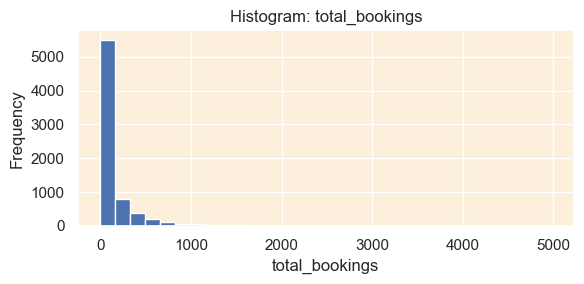

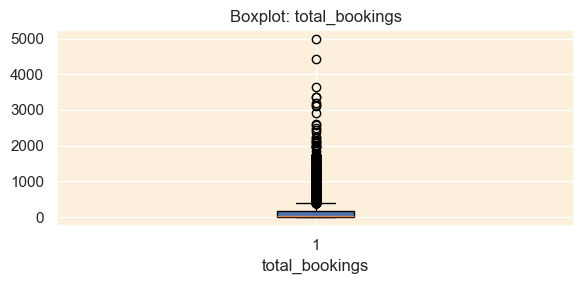

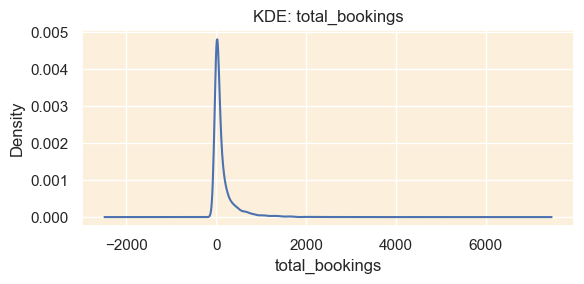

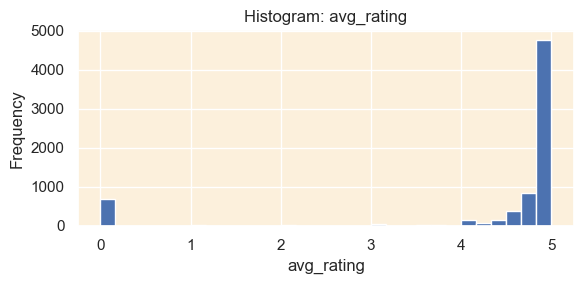

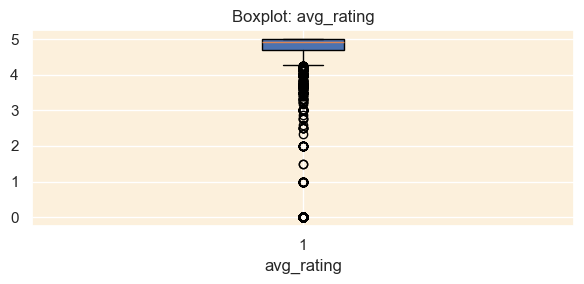

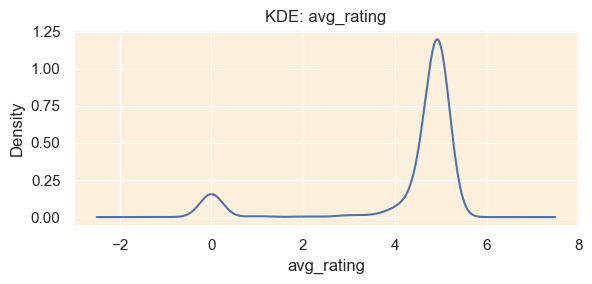

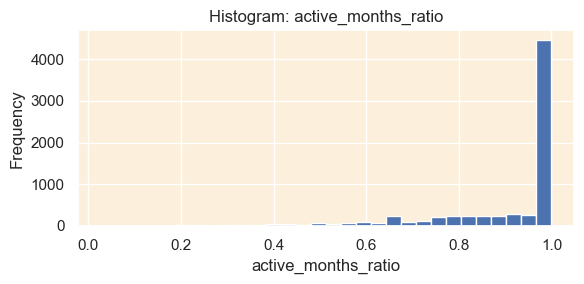

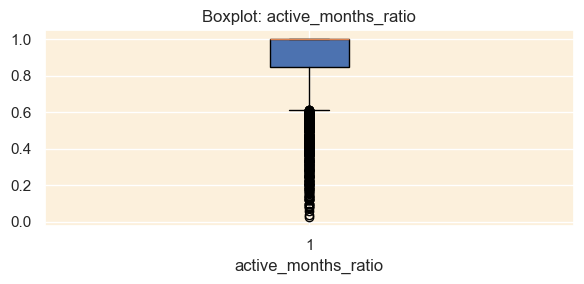

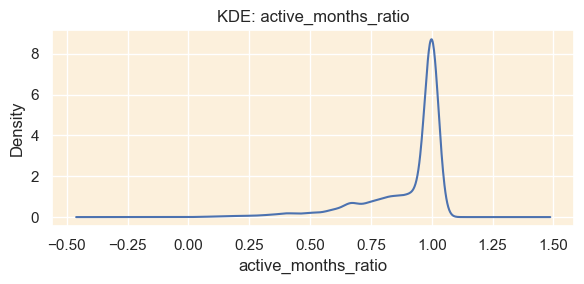

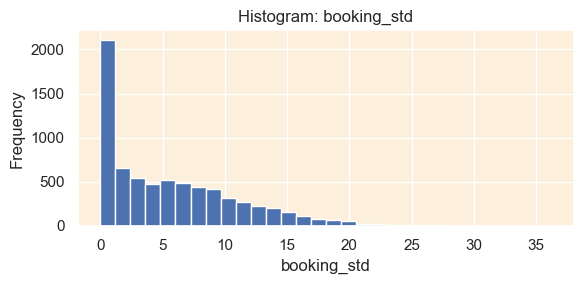

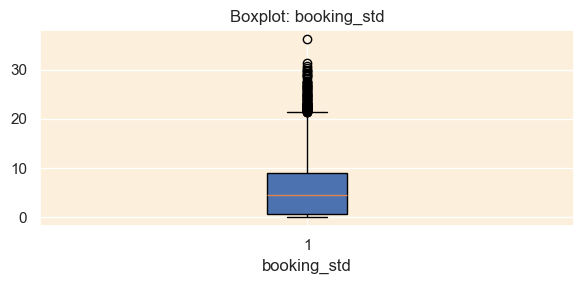

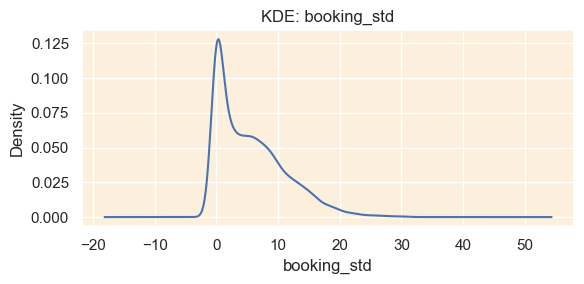

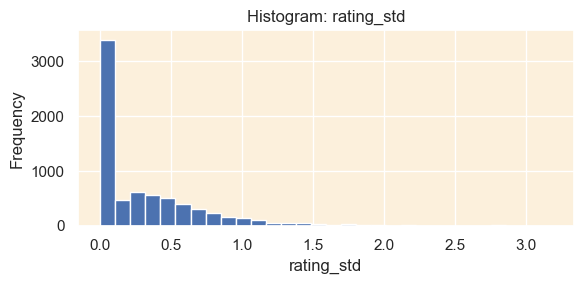

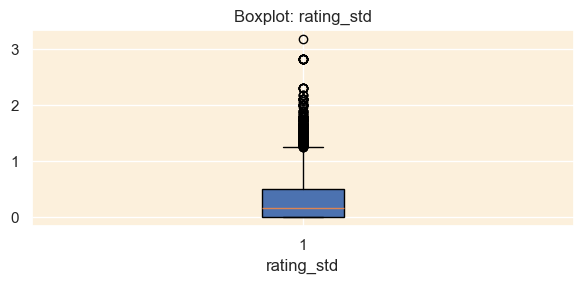

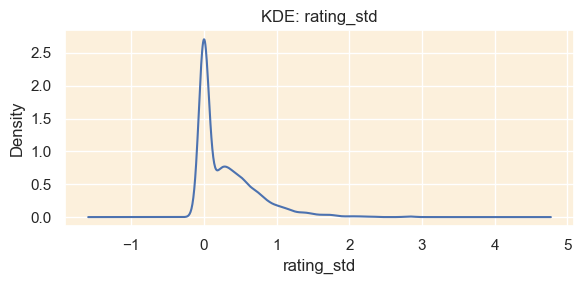

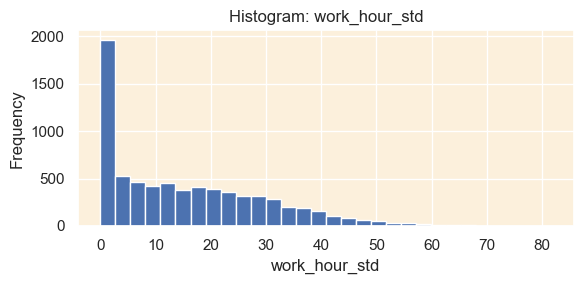

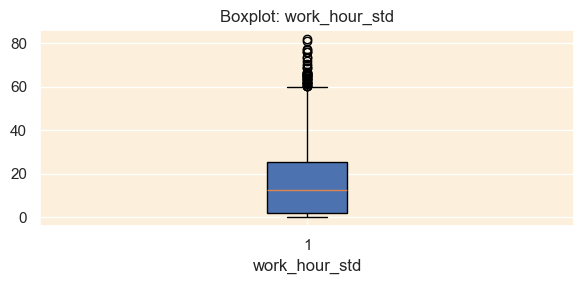

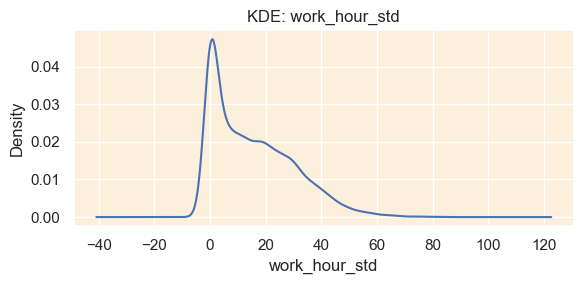

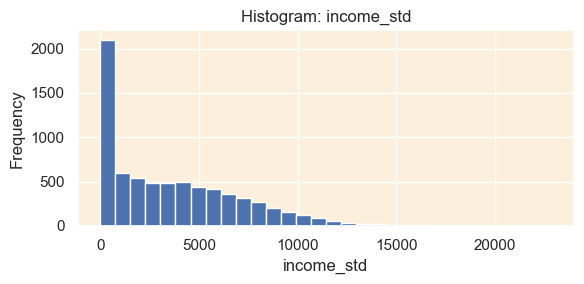

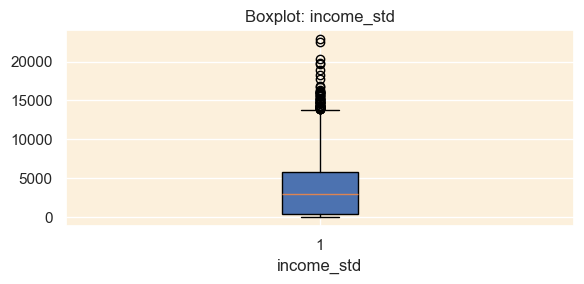

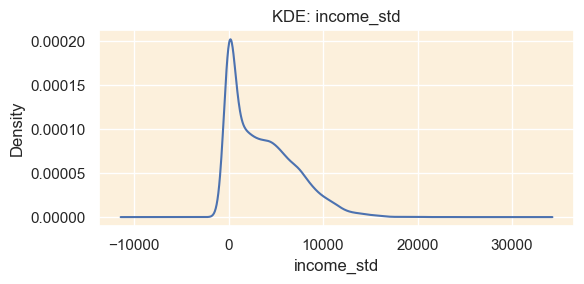

In [60]:
# ------------------------------
# Feature Visualization
# ------------------------------

#FEATURES_TO_PLOT = FEATURES  # or choose a subset for speed
FEATURES_TO_PLOT = ['total_bookings', 'avg_rating', 'active_months_ratio',
                    'booking_std', 'rating_std', 'work_hour_std', 'income_std']

for col in FEATURES_TO_PLOT:
    # Histogram
    plt.figure(figsize=(6,3))
    plt.hist(work[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    plt.boxplot(work[col].dropna(), vert=True, patch_artist=True)
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.tight_layout(); plt.show()

    # KDE
    plt.figure(figsize=(6,3))
    work[col].dropna().plot(kind="kde")
    plt.title(f"KDE: {col}")
    plt.xlabel(col)
    plt.tight_layout(); plt.show()

<a id="missing_values"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 6 |</span><span style='color:#ffffff'> Missing Values & Casting</span></b>
⬆️ [Table of Contents](#contents_table)

Impute numeric features.


<a id="imputation_theory"></a>

<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

### <b>Imputation Methods Theory</b>
- <b>6.1 Mean imputation</b>: is sensitive to outliers.
$$
\hat{x}_j = \frac{1}{n}\sum_{i=1}^n x_{ij}
$$
- <b>6.2 Median imputation</b>: is more robust to outliers. After imputation, cast to float for consistency.

In [61]:
# ------------------------------
# Missing Values & Casting
# ------------------------------

MAX_MISSING_COL_RATE = 0.5
NUMERIC_IMPUTE_STRATEGY = "median"
CAST_FLOAT64 = True

FEATURES = [c for c in FEATURES if work[c].isna().mean() <= MAX_MISSING_COL_RATE]

for c in FEATURES:
    work[c] = pd.to_numeric(work[c], errors="coerce")
    if NUMERIC_IMPUTE_STRATEGY == "mean":
        work[c] = work[c].fillna(work[c].mean())
    else:
        work[c] = work[c].fillna(work[c].median())
    if CAST_FLOAT64:
        work[c] = work[c].astype("float64")

print("Remaining features:", FEATURES)
display(work[FEATURES].head(3))

Remaining features: ['total_bookings', 'total_service_provided', 'total_service_cancelled', 'avg_rating', 'total_income', 'total_work_hour', 'avg_booking_per_month', 'avg_income_per_month', 'avg_work_hour_per_month', 'latest_month_booking', 'latest_month_rating', 'latest_diff_avg_booking', 'booking_ratio_latest_to_previous', 'work_hour_ratio_latest_to_previous', 'total_active_days', 'active_months_ratio', 'booking_std', 'rating_std', 'work_hour_std', 'income_std', 'tenures', 'total_unique_service', 'favorite_cleaning_hour', 'days_since_last_service', 'province_Bangkok', 'province_Chiang Mai', 'province_Chonburi', 'favorite_cleaning_day_Friday', 'favorite_cleaning_day_Monday', 'favorite_cleaning_day_Saturday', 'favorite_cleaning_day_Sunday', 'favorite_cleaning_day_Thursday', 'favorite_cleaning_day_Tuesday', 'favorite_cleaning_day_Wednesday']


,total_bookings,total_service_provided,total_service_cancelled,avg_rating,total_income,total_work_hour,avg_booking_per_month,avg_income_per_month,avg_work_hour_per_month,latest_month_booking,latest_month_rating,latest_diff_avg_booking,booking_ratio_latest_to_previous,work_hour_ratio_latest_to_previous,total_active_days,active_months_ratio,booking_std,rating_std,work_hour_std,income_std,tenures,total_unique_service,favorite_cleaning_hour,days_since_last_service,province_Bangkok,province_Chiang Mai,province_Chonburi,favorite_cleaning_day_Friday,favorite_cleaning_day_Monday,favorite_cleaning_day_Saturday,favorite_cleaning_day_Sunday,favorite_cleaning_day_Thursday,favorite_cleaning_day_Tuesday,favorite_cleaning_day_Wednesday
0,406.0,31.0,283.0,5.000000,23863.55,93.5,3.0,2169.413636,8.0,1.0,0.0,-2.0,0.500000,0.500000,5.0,0.754545,4.034387,0.00000,8.935883,2129.786383,20.0,1.0,10.0,1006.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.0,5.0,4.0,4.500000,1384.44,10.0,2.0,692.220000,5.0,1.0,0.0,-1.0,0.250000,0.250000,3.0,0.057471,2.121320,0.00000,4.242641,271.840131,0.0,1.0,17.0,2840.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,426.0,415.0,2.0,4.981949,152059.19,844.5,38.0,13823.562727,76.0,23.0,5.0,-15.0,0.410714,0.357143,1.0,1.000000,26.078204,0.09344,38.204295,7174.030599,0.0,1.0,12.0,3029.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<a id="feature_engineering"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 7 |</span><span style='color:#ffffff'> Feature Engineering</span></b>
⬆️ [Table of Contents](#contents_table)

Add domain KPIs carefully. Handle divide-by-zero and missing values.


<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

__`ADD_DERIVED = True`__ → include engineered feature `income_per_hour`
- It will create a new derived feature `income_per_hour` in your work DataFrame.

- It will handle divide-by-zero (replace 0 with NaN) and then fill missing values with the median.

- It will add `income_per_hour` into FEATURES list (so models will use it).

__`ADD_DERIVED = False`__ → ignore it, stick to only existing features



In [62]:
# ------------------------------
# Feature Engineering
# ------------------------------

ADD_DERIVED = False

if ADD_DERIVED and ("total_income" in work.columns) and ("total_work_hour" in work.columns):
    work["income_per_hour"] = work["total_income"] / work["total_work_hour"].replace(0, np.nan)
    work["income_per_hour"] = work["income_per_hour"].fillna(work["income_per_hour"].median())
    if "income_per_hour" not in FEATURES:
        FEATURES.append("income_per_hour")

print("Features:", FEATURES)

Features: ['total_bookings', 'total_service_provided', 'total_service_cancelled', 'avg_rating', 'total_income', 'total_work_hour', 'avg_booking_per_month', 'avg_income_per_month', 'avg_work_hour_per_month', 'latest_month_booking', 'latest_month_rating', 'latest_diff_avg_booking', 'booking_ratio_latest_to_previous', 'work_hour_ratio_latest_to_previous', 'total_active_days', 'active_months_ratio', 'booking_std', 'rating_std', 'work_hour_std', 'income_std', 'tenures', 'total_unique_service', 'favorite_cleaning_hour', 'days_since_last_service', 'province_Bangkok', 'province_Chiang Mai', 'province_Chonburi', 'favorite_cleaning_day_Friday', 'favorite_cleaning_day_Monday', 'favorite_cleaning_day_Saturday', 'favorite_cleaning_day_Sunday', 'favorite_cleaning_day_Thursday', 'favorite_cleaning_day_Tuesday', 'favorite_cleaning_day_Wednesday']


<a id="feature_selection"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 8 |</span><span style='color:#ffffff'> Feature Selection</span></b>
⬆️ [Table of Contents](#contents_table)

Reduce redundancy/noise. 

<b>Approaches</b>: variance filter, correlation filter, univariate tests, model-based selection.

In [63]:
# ------------------------------
# Feature Selection
# ------------------------------

X_fs = work[FEATURES].copy()

if FEATURE_SELECTION_METHOD == "variance":       # Selection by variance
    sel = VarianceThreshold(threshold=VARIANCE_MIN)
    sel.fit(X_fs)
    FEATURES = X_fs.columns[sel.get_support()].tolist()

elif FEATURE_SELECTION_METHOD == "correlation":  # Selection by correlation
    corr = X_fs.corr(numeric_only=True).abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    drop = [c for c in upper.columns if any(upper[c] > CORR_MAX)]
    FEATURES = [c for c in FEATURES if c not in drop]

elif FEATURE_SELECTION_METHOD == "univariate":   # Selection by single-variable (unsure whether it will work or not!)
    y_dummy = np.random.randint(0, 2, size=len(X_fs))
    if UNIVARIATE_SCORE == "chi2":
        X_pos = X_fs - X_fs.min() + 1e-9
        sel = SelectKBest(score_func=chi2, k=min(TOP_K, X_fs.shape[1]))
        sel.fit(X_pos, y_dummy)
    else:
        sel = SelectKBest(score_func=f_classif, k=min(TOP_K, X_fs.shape[1]))
        sel.fit(X_fs, y_dummy)
    FEATURES = X_fs.columns[sel.get_support()].tolist()

elif FEATURE_SELECTION_METHOD == "model":        # Selection by a model
    y_dummy = np.random.randint(0, 2, size=len(X_fs))
    if MODEL_TYPE == "rf":
        model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
    else:
        model = LogisticRegression(penalty="l1", solver="liblinear", random_state=RANDOM_STATE, max_iter=1000)
    model.fit(X_fs, y_dummy)
    sel = SelectFromModel(model, prefit=True, threshold="median")
    FEATURES = X_fs.columns[sel.get_support()].tolist()

print("Selected features:", FEATURES)

Selected features: ['total_bookings', 'total_service_provided', 'avg_rating', 'total_income', 'total_work_hour', 'latest_month_rating', 'latest_diff_avg_booking', 'booking_std', 'rating_std', 'favorite_cleaning_day_Monday', 'favorite_cleaning_day_Tuesday', 'favorite_cleaning_day_Wednesday']


<a id="outlier_handling"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 9 |</span><span style='color:#ffffff'> Outlier Handling</span></b>
⬆️ [Table of Contents](#contents_table)


<a id="outlier_theory"></a>

<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

### <b>Outlier Handling Theory</b>
<b>Z-score rule</b>: Works best if the data is approximately normal (bell-shaped). Flags values that are many standard deviations away from the mean. Sensitive to skewed distributions, a few extreme outliers can distort the mean/std, making it less reliable. 
$$
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}, \quad \text{keep if } |z_{ij}| \leq Z_{\max}
$$

<b>IQR rule (Tukey fences)</b>: Non-parametric (no assumption about distribution). Uses median & quartiles, more robust to skewed data. 
$$
\text{keep if } Q1 - \alpha\,IQR \le x_{ij} \le Q3 + \alpha\,IQR
$$
where $IQR = Q3 - Q1$ and $\alpha$ is a multiplier.

In [64]:
# ------------------------------
# Outlier Handling
# ------------------------------

mask_keep = pd.Series(True, index=work.index)

if OUTLIER_METHOD == "zscore":
    for c in FEATURES:
        mu = work[c].mean()
        sd = work[c].std(ddof=0)
        if sd and not np.isnan(sd) and sd != 0:
            z = (work[c] - mu) / sd
            mask_keep &= z.between(-Z_MAX, Z_MAX) | z.isna()
elif OUTLIER_METHOD == "iqr":
    for c in FEATURES:
        q1, q3 = work[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        low = q1 - IQR_MULT * iqr
        high = q3 + IQR_MULT * iqr
        mask_keep &= work[c].between(low, high) | work[c].isna()

before = len(work)
work = work.loc[mask_keep].reset_index(drop=True)
after = len(work)
print("Outlier removed rows:", before - after, "| Remaining:", after)

Outlier removed rows: 188 | Remaining: 7071


<a id="scaling"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 10 |</span><span style='color:#ffffff'> Scaling</span></b>
⬆️ [Table of Contents](#contents_table)

Scale features for distance comparability. Standard, Min-Max, or Robust scaling.

In [65]:
# --------------------
# Scaling
# --------------------

if SCALER == "standard":
    scaler = StandardScaler()
elif SCALER == "minmax":
    scaler = MinMaxScaler()
elif SCALER == "robust":
    scaler = RobustScaler()
else:
    raise ValueError("Unsupported SCALER")

X = work[FEATURES].values
X_scaled = scaler.fit_transform(X)
print("Scaled matrix shape:", X_scaled.shape)

Scaled matrix shape: (7071, 12)


<a id="compare_scalers"></a>

<font color=#ffffff>

### <b><span style='color:#ffa705'>Step 10.1 |</span><span style='color:#ffffff'> Compare Clustering Across Two Scalers</span></b>
⬆️ [Table of Contents](#contents_table)

Different scalers change geometry. Compare silhouettes under each.

In [66]:
# ----------------------------------------
# Compare clustering across two scalers
# ----------------------------------------

scalers = {"standard": StandardScaler(), "minmax": MinMaxScaler(), "robust": RobustScaler()}
results = {}

for name, sc in scalers.items():
    Xt = sc.fit_transform(work[FEATURES])
    mdl = KMeans(n_clusters=5, random_state=RANDOM_STATE)
    y = mdl.fit_predict(Xt)
    results[name] = silhouette_score(Xt, y) if len(set(y)) > 1 else np.nan

print("Silhouette scores per scaler:", results)


Silhouette scores per scaler: {'standard': 0.2489205850944272, 'minmax': 0.4343076588340471, 'robust': 0.4521298152053991}


<a id="pca"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 11 |</span><span style='color:#ffffff'> PCA</span></b>
⬆️ [Table of Contents](#contents_table)

<a id="pca_theory"></a>

<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

### <b>Principal Component Analysis Theory</b>
PCA finds orthogonal directions (components) of maximal variance.

**Standardization**:
$$
x'_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

**Covariance matrix**:
$$
\Sigma = \frac{1}{n-1} X^\top X
$$

**Eigen decomposition**:
$$
\Sigma v_k = \lambda_k v_k
$$

**Projection**:
$$
Z = X V_m
$$

**Explained variance ratio of component** $k$:
$$
\text{EVR}_k = \frac{\lambda_k}{\sum_{j=1}^p \lambda_j}
$$


In [67]:
# ------------------------------
# Principal Component Analysis
# ------------------------------

if APPLY_PCA:
    pca = PCA(n_components=PCA_N_COMPONENTS, random_state=RANDOM_STATE)
    X_emb = pca.fit_transform(X_scaled)
    explained = getattr(pca, "explained_variance_ratio_", None)
    print("PCA shape:", X_emb.shape, "| Explained variance ratio:", explained)
else:
    X_emb = X_scaled.copy()
    print("PCA skipped. Using scaled features.")


PCA shape: (7071, 4) | Explained variance ratio: [0.73158928 0.21765687 0.01854744 0.0129654 ]


<a id="pca_visualization"></a>

<font color=#ffffff>

### <b><span style='color:#ffa705'>Step 11.1 |</span><span style='color:#ffffff'> 3D PCA Visualization</span></b>
⬆️ [Table of Contents](#contents_table)

Visualize clusters in first three PCs to inspect separability.

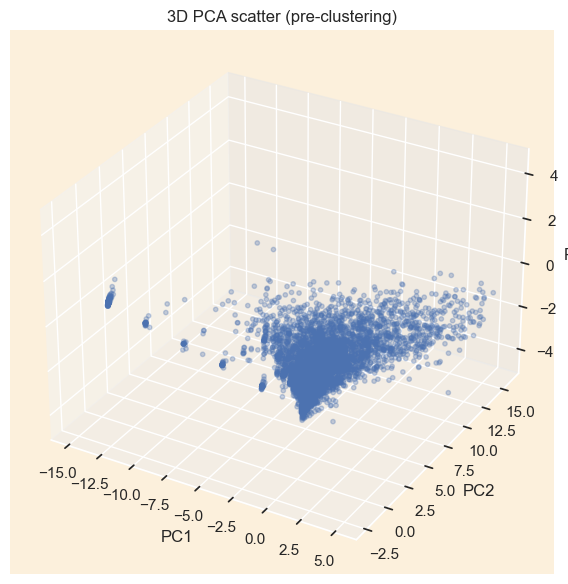

In [68]:
# ------------------------------
# 3D PCA visualization
# ------------------------------

if APPLY_PCA and hasattr(globals().get("pca", None), "n_components_") and getattr(pca, "n_components_", 0) >= 3:
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection="3d")
    # placeholders before clustering
    ax.scatter(X_emb[:,0], X_emb[:,1], X_emb[:,2], s=10, alpha=0.3)
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
    ax.set_title("3D PCA scatter (pre-clustering)")
    plt.tight_layout(); plt.show()
else:
    print("3D PCA requires APPLY_PCA=True and PCA_N_COMPONENTS >= 3")

<a id="clustering_models"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 12 |</span><span style='color:#ffffff'> Clustering Models</span></b>
⬆️ [Table of Contents](#contents_table)

Pick KMeans, GMM, Agglomerative, DBSCAN, or Spectral based on data structure.


In [69]:
# ------------------------------
# Clustering Models
# ------------------------------

# KMeans
K = 3
K_INIT = "k-means++"
K_N_INIT = "auto"
K_MAX_ITER = 600 #300

# GMM
GMM_COMPONENTS = 3
GMM_COV_TYPE = "full"
GMM_REG_COV = 1e-6

# Agglomerative
AGGLO_N_CLUSTERS = 3
AGGLO_LINKAGE = "ward"

# DBSCAN
DBSCAN_EPS = 1.5 #0.7
DBSCAN_MIN_SAMPLES = 20 #10
DBSCAN_METRIC = "euclidean"

# Spectral
SPECTRAL_N_CLUSTERS = 3
SPECTRAL_ASSIGN_LABELS = "kmeans"
SPECTRAL_AFFINITY = "nearest_neighbors"

# Fit + labels
if ALGO == "kmeans":
    model = KMeans(n_clusters=K, init=K_INIT, n_init=K_N_INIT, max_iter=K_MAX_ITER, random_state=RANDOM_STATE)
    model.fit(X_emb)
    labels = model.labels_.astype(int)
elif ALGO == "gmm":
    model = GaussianMixture(n_components=GMM_COMPONENTS, covariance_type=GMM_COV_TYPE, reg_covar=GMM_REG_COV, random_state=RANDOM_STATE)
    model.fit(X_emb)
    labels = model.predict(X_emb).astype(int)
elif ALGO == "agglo":
    model = AgglomerativeClustering(n_clusters=AGGLO_N_CLUSTERS, linkage=AGGLO_LINKAGE)
    labels = model.fit_predict(X_emb).astype(int)
elif ALGO == "dbscan":
    model = DBSCAN(eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES, metric=DBSCAN_METRIC)
    labels = model.fit_predict(X_emb).astype(int)  # -1 = noise
elif ALGO == "spectral":
    model = SpectralClustering(n_clusters=SPECTRAL_N_CLUSTERS, affinity=SPECTRAL_AFFINITY, assign_labels=SPECTRAL_ASSIGN_LABELS, random_state=RANDOM_STATE)
    labels = model.fit_predict(X_emb).astype(int)
else:
    raise ValueError("Unsupported ALGO")

work["cluster"] = labels
print("Cluster counts:")
display(work["cluster"].value_counts(dropna=False).sort_index())
display(work[[ID_COL, "cluster"]].head(10))


Cluster counts:


cluster
0     901
1    5425
2     745
Name: count, dtype: int64

,professional_id,cluster
0,5,1
1,6,1
2,7,0
3,8,1
4,9,1
5,11,1
6,12,1
7,16,1
8,17,1
9,18,1


<a id="hyperparameter_sweeps"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 13 |</span><span style='color:#ffffff'> Hyperparameter Sweeps</span></b>
⬆️ [Table of Contents](#contents_table)

Evaluate parameter grids with internal indices and information criteria.

In [70]:
# ------------------------------
# Hyperparameter Sweeps
# ------------------------------

if DO_SWEEP and ALGO == "kmeans":
    rows = []
    for k in K_RANGE:
        mdl = KMeans(n_clusters=k, init=K_INIT, n_init=K_N_INIT, max_iter=K_MAX_ITER, random_state=RANDOM_STATE)
        mdl.fit(X_emb)
        y = mdl.labels_.astype(int)
        inertia = getattr(mdl, "inertia_", np.nan)
        if len(np.unique(y)) > 1 and len(np.unique(y)) < len(y):
            sil = silhouette_score(X_emb, y); dbi = davies_bouldin_score(X_emb, y); ch = calinski_harabasz_score(X_emb, y)
        else:
            sil, dbi, ch = np.nan, np.nan, np.nan
        rows.append(dict(k=k, inertia=inertia, silhouette=sil, davies_bouldin=dbi, calinski_harabasz=ch))
    sweep_kmeans = pd.DataFrame(rows); display(sweep_kmeans.sort_values(["silhouette","calinski_harabasz"], ascending=[False, False]).head(10))

elif DO_SWEEP and ALGO == "gmm":
    rows = []
    for k in GMM_RANGE:
        mdl = GaussianMixture(n_components=k, covariance_type=GMM_COV_TYPE, reg_covar=GMM_REG_COV, random_state=RANDOM_STATE)
        mdl.fit(X_emb)
        y = mdl.predict(X_emb).astype(int)
        bic = mdl.bic(X_emb); aic = mdl.aic(X_emb)
        if len(np.unique(y)) > 1 and len(np.unique(y)) < len(y):
            sil = silhouette_score(X_emb, y); dbi = davies_bouldin_score(X_emb, y); ch = calinski_harabasz_score(X_emb, y)
        else:
            sil, dbi, ch = np.nan, np.nan, np.nan
        rows.append(dict(components=k, bic=bic, aic=aic, silhouette=sil, davies_bouldin=dbi, calinski_harabasz=ch))
    sweep_gmm = pd.DataFrame(rows); display(sweep_gmm.sort_values(["bic","aic"], ascending=[True, True]).head(10))

elif DO_SWEEP and ALGO == "dbscan":
    rows = []
    for eps in DBSCAN_EPS_GRID:
        for ms in DBSCAN_MIN_SAMPLES_GRID:
            mdl = DBSCAN(eps=eps, min_samples=ms, metric="euclidean")
            y = mdl.fit_predict(X_emb).astype(int)
            k = len(set(y)) - (1 if -1 in set(y) else 0)
            if k > 1 and np.any(y != -1):
                mask = y != -1; X_eval, y_eval = X_emb[mask], y[mask]
                if len(np.unique(y_eval)) > 1:
                    sil = silhouette_score(X_eval, y_eval); dbi = davies_bouldin_score(X_eval, y_eval); ch = calinski_harabasz_score(X_eval, y_eval)
                else:
                    sil, dbi, ch = np.nan, np.nan, np.nan
            else:
                sil, dbi, ch = np.nan, np.nan, np.nan
            rows.append(dict(eps=eps, min_samples=ms, clusters=k, silhouette=sil, davies_bouldin=dbi, calinski_harabasz=ch))
    sweep_dbscan = pd.DataFrame(rows); display(sweep_dbscan.sort_values(["silhouette","calinski_harabasz"], ascending=[False, False]).head(10))
else:
    print("Sweep disabled or not applicable for current ALGO.")

,k,inertia,silhouette,davies_bouldin,calinski_harabasz
1,3,31256.618458,0.676442,0.481008,24802.478084
2,4,22075.354038,0.526081,0.644461,24388.387606
3,5,16822.114937,0.522240,0.721989,24552.307956
5,7,11372.957293,0.513023,0.760884,24767.451262
4,6,12916.350501,0.512990,0.717931,26004.425094
6,8,9824.901460,0.481560,0.791839,24730.469863
8,10,8162.534882,0.466294,0.892783,23304.445306
7,9,8833.808443,0.464375,0.851266,24162.348228
9,11,7515.842808,0.456937,0.908063,22836.137292
10,12,7011.017917,0.438132,0.930898,22299.115869


<a id="validation_metrics"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 14 |</span><span style='color:#ffffff'> Validation Metrics</span></b>
⬆️ [Table of Contents](#contents_table)

<a id="validation_theory"></a>

<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

### <b>Validation Metrics Theory</b>
Internal validation indices quantify compactness and separation.

**Silhouette (point $i$)** — Let $a(i)$ be the mean intra-cluster distance and $b(i)$ the smallest mean inter-cluster distance:
$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

**Davies–Bouldin (DBI)** — Cluster scatter $S_i$ and centroid distances $M_{ij}$:
$$
R_{ij} = \frac{S_i + S_j}{M_{ij}}, \quad R_i = \max_{j\ne i} R_{ij}, \quad
DBI = \frac{1}{k}\sum_{i=1}^k R_i
$$

**Calinski–Harabasz (CH)** — Between-cluster vs within-cluster dispersion matrices $B_k, W_k$:
$$
CH(k) = \frac{\mathrm{tr}(B_k)/(k-1)}{\mathrm{tr}(W_k)/(n-k)}
$$

In [71]:
# ------------------------------
# Validation Metrics
# ------------------------------

labels = work["cluster"].values
unique_clusters = sorted(set(labels))
valid = (len(unique_clusters) > 1) and (len(unique_clusters) < len(labels))

if valid:
    if -1 in unique_clusters:
        mask = labels != -1; X_eval = X_emb[mask]; y_eval = labels[mask]
    else:
        X_eval = X_emb; y_eval = labels
    if len(np.unique(y_eval)) > 1:
        sil = silhouette_score(X_eval, y_eval); dbi = davies_bouldin_score(X_eval, y_eval); ch = calinski_harabasz_score(X_eval, y_eval)
    else:
        sil, dbi, ch = np.nan, np.nan, np.nan
else:
    sil, dbi, ch = np.nan, np.nan, np.nan

print({"silhouette": sil, "davies_bouldin": dbi, "calinski_harabasz": ch})

{'silhouette': 0.6764421430125165, 'davies_bouldin': 0.4810081058762064, 'calinski_harabasz': 24802.478083787613}


<a id="visualization"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 15 |</span><span style='color:#ffffff'> Visualization</span></b>
⬆️ [Table of Contents](#contents_table)

2D embedding scatter with cluster centroids.

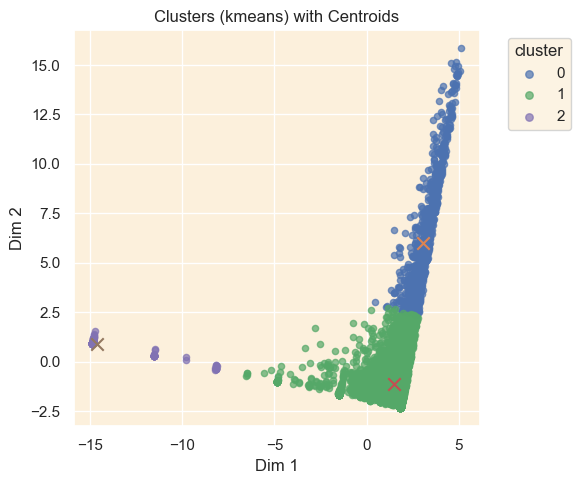

In [72]:
# ------------------------------
# Visualization
# ------------------------------

plt.figure(figsize=(6,5))
labels = work["cluster"].values
unique = sorted(set(labels))
for u in unique:
    mask = labels == u
    plt.scatter(X_emb[mask, 0], X_emb[mask, 1], s=20, label=str(u), alpha=0.7)
    cx, cy = X_emb[mask, 0].mean(), X_emb[mask, 1].mean()
    plt.scatter(cx, cy, marker="x", s=80)
plt.xlabel("Dim 1"); plt.ylabel("Dim 2"); plt.title(f"Clusters ({ALGO}) with Centroids")
plt.legend(title="cluster", markerscale=1.2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(); plt.show()


In [73]:
# ------------------------------
# Dark Theme for Plotly
# ------------------------------

def apply_dark_theme(fig, bg_color="#10041c", text_color="white"):
    fig.update_layout(
        plot_bgcolor=bg_color,       # plot area background
        paper_bgcolor=bg_color,      # outside plot background
        font=dict(color=text_color)  # all text
    )
    return fig

In [74]:
# ------------------------------
# 3D Interactive Visualization
# ------------------------------

if APPLY_PCA and X_emb.shape[1] >= 3:
    # Create a DataFrame for plotting
    plot_df_3d = pd.DataFrame(X_emb[:, :3], columns=['PC1', 'PC2', 'PC3'])
    plot_df_3d['cluster'] = work['cluster']
    plot_df_3d[ID_COL] = work[ID_COL]

    # Create the 3D scatter plot
    fig_3d = px.scatter_3d(
        plot_df_3d,
        x='PC1',
        y='PC2',
        z='PC3',
        color='cluster',
        title=f'3D Interactive Clusters ({ALGO})',
        hover_data=[ID_COL],
        category_orders={"cluster": sorted(work["cluster"].unique())}
    )

    fig_3d.update_layout(legend_title_text='Cluster', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
    fig_3d = apply_dark_theme(fig_3d)
    fig_3d.show()
else:
    print("3D Plotly visualization requires APPLY_PCA=True and PCA_N_COMPONENTS >= 3.")

<img src="https://github.com/FearlessFrench/provider-segmentation/blob/main/visuals/17_K-Means_Clustering.png?raw=true">
<img src="https://github.com/FearlessFrench/provider-segmentation/blob/main/visuals/18_Hierarchical_Clustering.png?raw=true">
<img src="https://github.com/FearlessFrench/provider-segmentation/blob/main/visuals/19_DBSCAN.png?raw=true">

<a id="clustering_profiling"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 16 |</span><span style='color:#ffffff'> Clustering Profiling</span></b>
⬆️ [Table of Contents](#contents_table)

Summarize clusters using raw means and standardized means. 

<b>Standardization</b>:
$$
z = \frac{x - \mu}{\sigma}
$$


In [75]:
# ------------------------------
# Cluster Profiling
# ------------------------------

profile = work[[ID_COL, "cluster"] + [c for c in FEATURES if c in work.columns]].copy()

mu = profile[[c for c in FEATURES if c in profile.columns]].mean()
sd = profile[[c for c in FEATURES if c in profile.columns]].std(ddof=0).replace(0, np.nan)

zcols = []
for c in FEATURES:
    if c in profile.columns:
        zc = f"z_{c}"
        profile[zc] = (profile[c] - mu[c]) / sd[c]
        zcols.append(zc)

counts = profile["cluster"].value_counts().sort_index().to_frame("n")
feature_means = profile.groupby("cluster")[[c for c in FEATURES if c in profile.columns]].mean().round(3)
z_means = profile.groupby("cluster")[zcols].mean().round(2)

print("Counts"); display(counts)
print("Feature means by cluster"); display(feature_means)
print("Standardized means (z-scores) by cluster"); display(z_means)


Counts


,n
cluster,
0,901
1,5425
2,745


Feature means by cluster


,total_bookings,total_service_provided,avg_rating,total_income,total_work_hour,latest_month_rating,latest_diff_avg_booking,booking_std,rating_std,favorite_cleaning_day_Monday,favorite_cleaning_day_Tuesday,favorite_cleaning_day_Wednesday
cluster,,,,,,,,,,,,
0,562.726,554.719,4.898,410792.390,1746.953,2.245,-13.558,12.060,0.398,0.117,0.063,0.080
1,67.339,66.248,4.832,47876.094,204.053,2.980,-3.295,5.106,0.321,0.097,0.077,0.079
2,2.344,2.289,0.078,1548.241,6.697,0.069,-0.007,0.197,0.004,0.107,0.113,0.114


Standardized means (z-scores) by cluster


,z_total_bookings,z_total_service_provided,z_avg_rating,z_total_income,z_total_work_hour,z_latest_month_rating,z_latest_diff_avg_booking,z_booking_std,z_rating_std,z_favorite_cleaning_day_Monday,z_favorite_cleaning_day_Tuesday,z_favorite_cleaning_day_Wednesday
cluster,,,,,,,,,,,,
0,2.20,2.20,0.37,2.21,2.20,-0.14,-1.44,1.23,0.26,0.05,-0.06,-0.01
1,-0.28,-0.28,0.33,-0.28,-0.28,0.17,0.15,-0.07,0.06,-0.01,-0.01,-0.01
2,-0.61,-0.61,-2.86,-0.60,-0.60,-1.04,0.66,-0.99,-0.77,0.02,0.12,0.11


<a id="cluster_characteristic"></a>

<font color=#ffffff>

### <b><span style='color:#ffa705'>Step 16.1 |</span><span style='color:#ffffff'> Cluster Characteristic Visualization</span></b>
⬆️ [Table of Contents](#contents_table)

Per-feature distributions across clusters via box, violin, and mean bars.

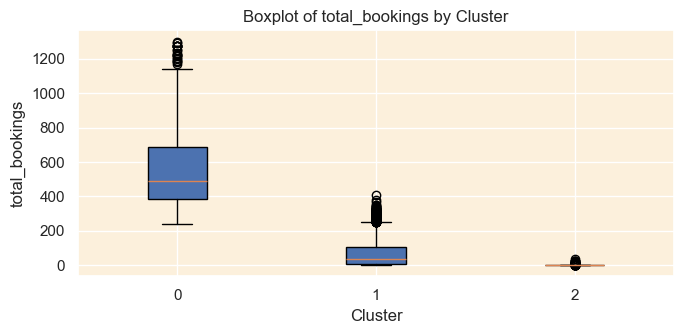

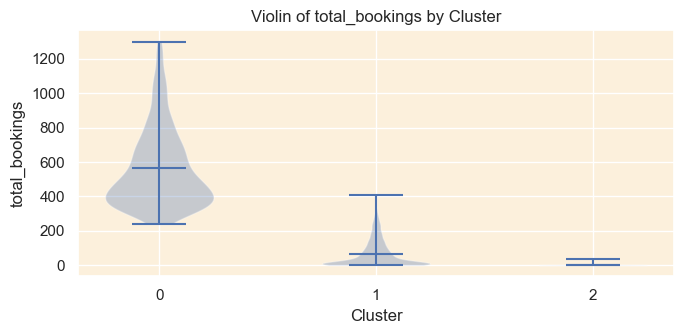

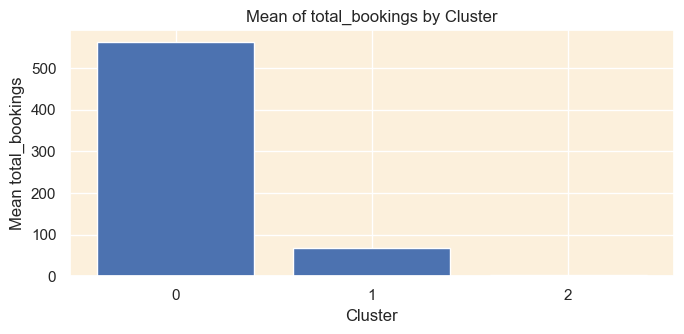

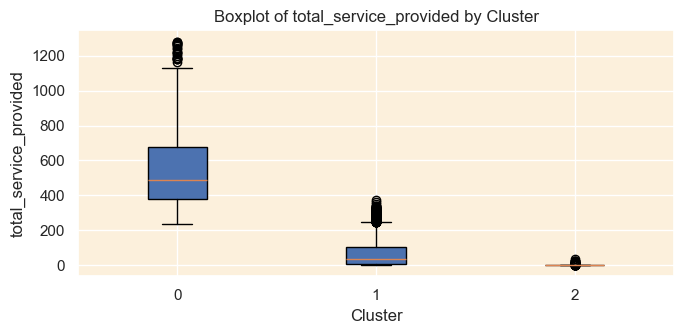

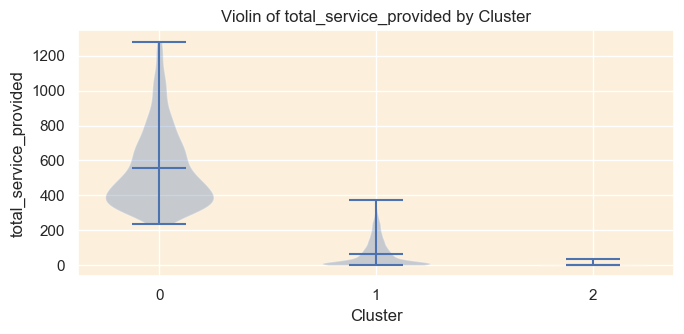

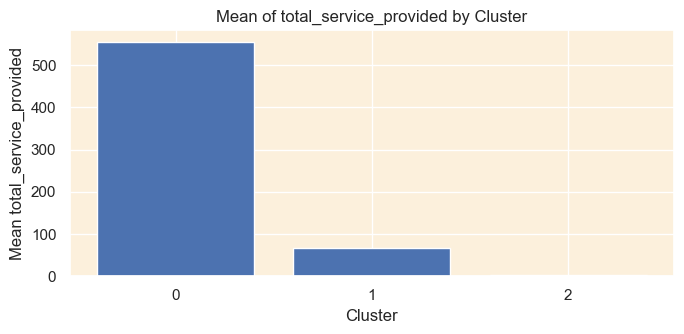

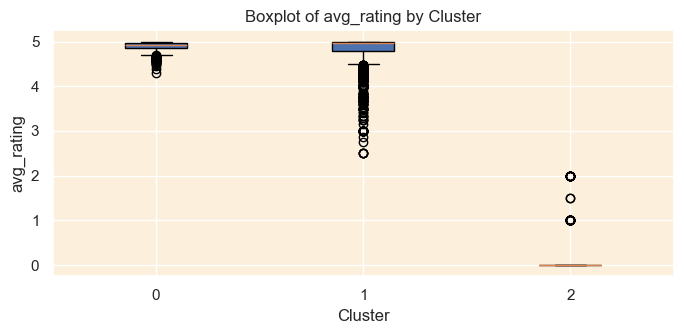

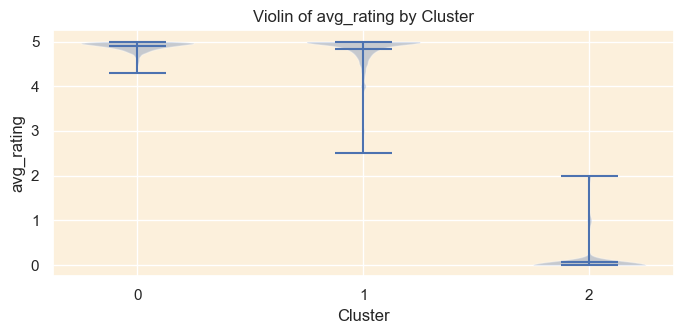

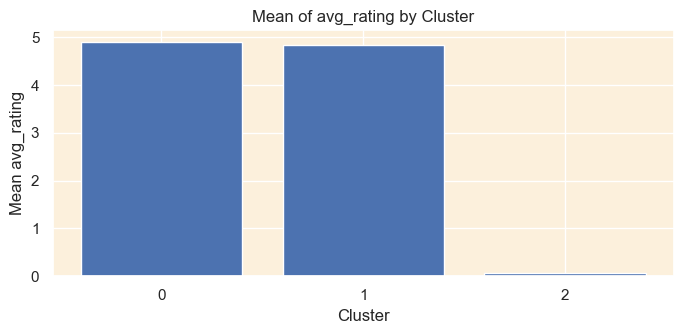

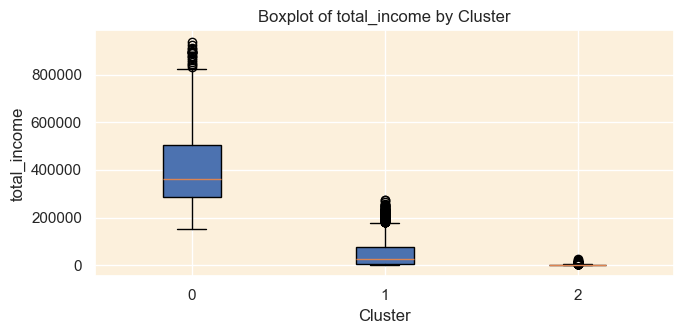

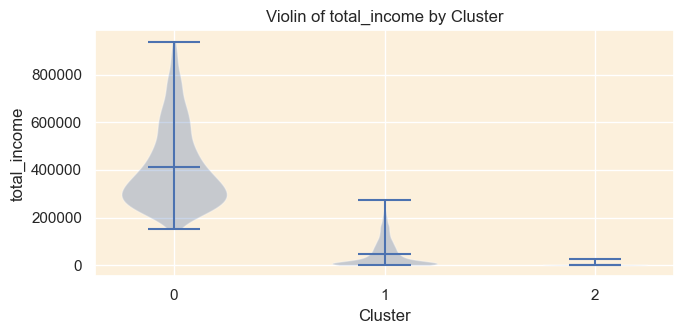

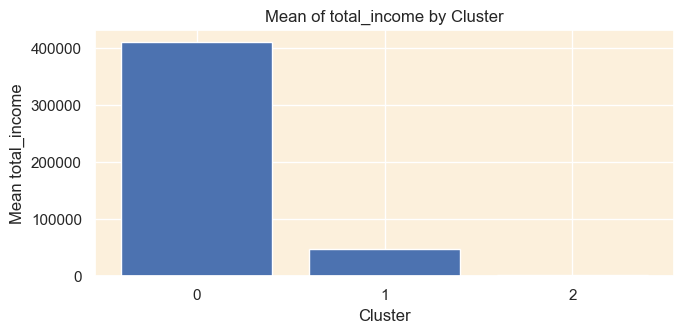

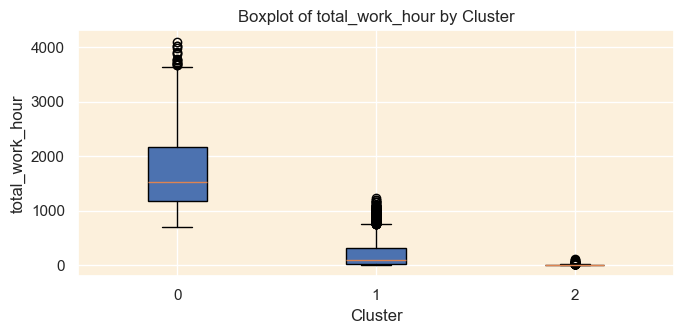

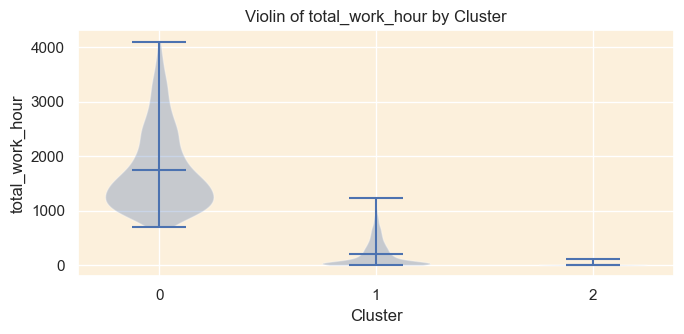

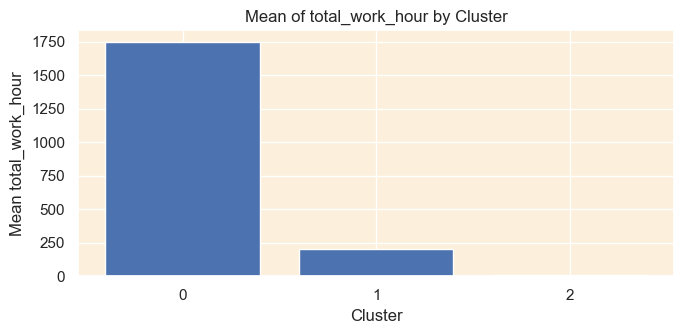

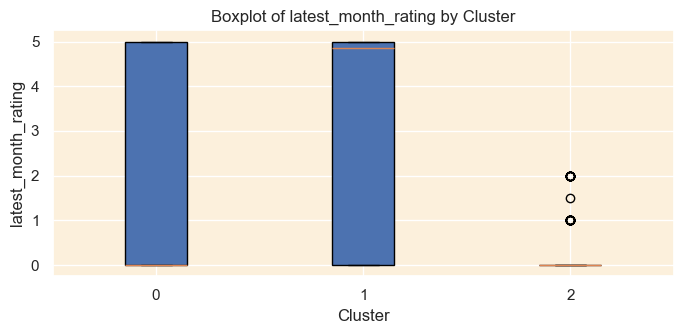

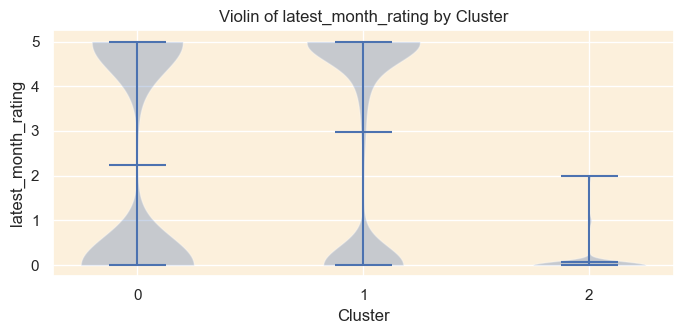

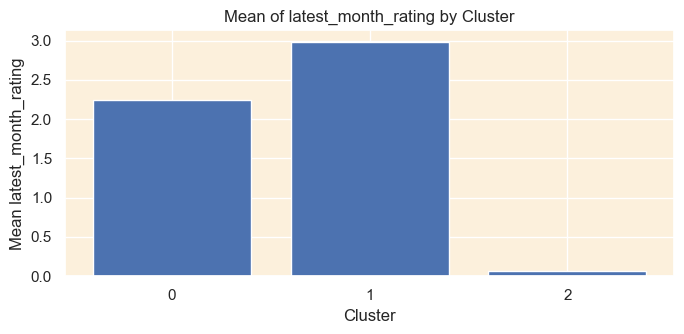

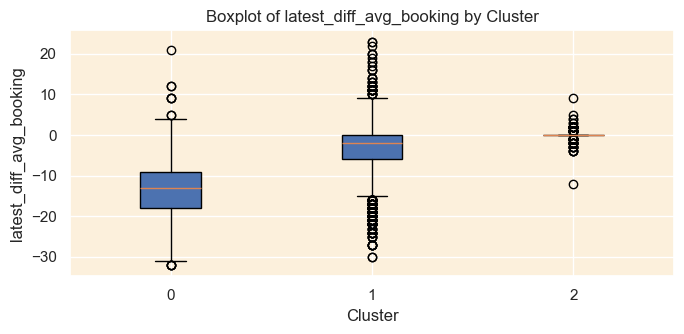

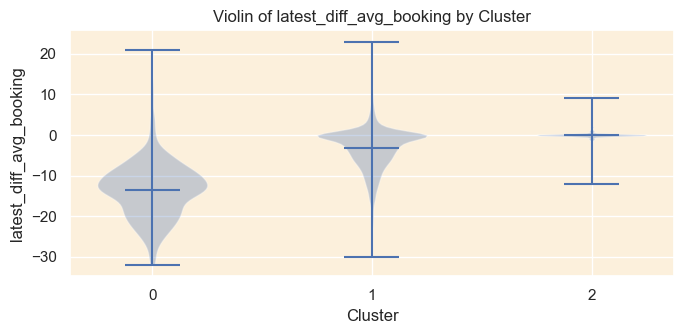

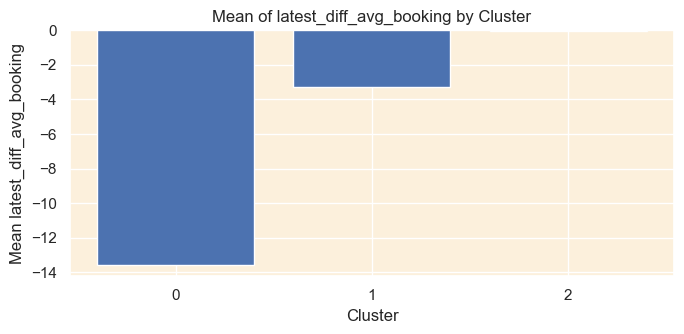

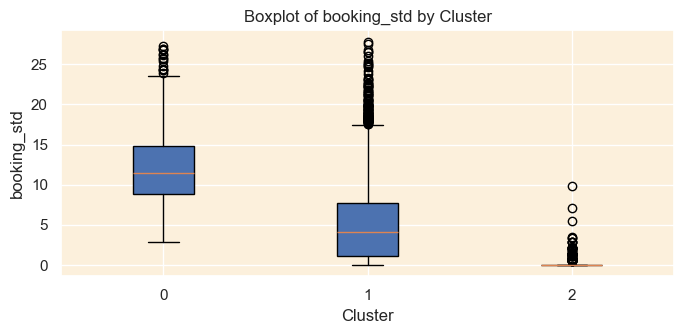

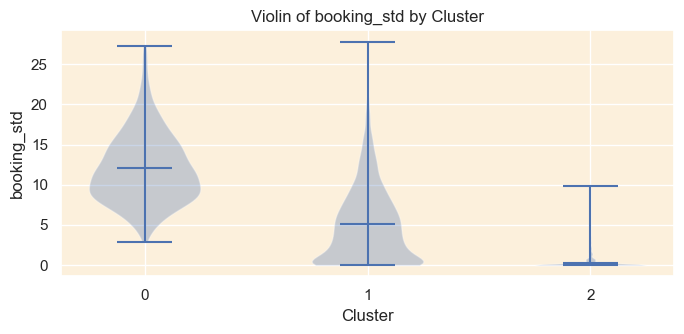

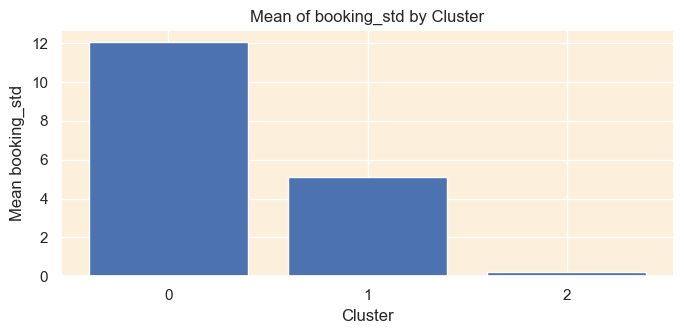

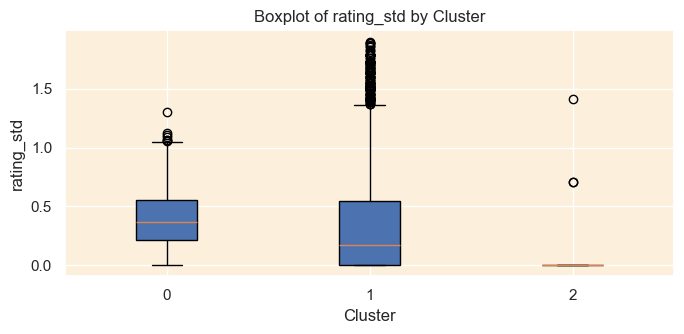

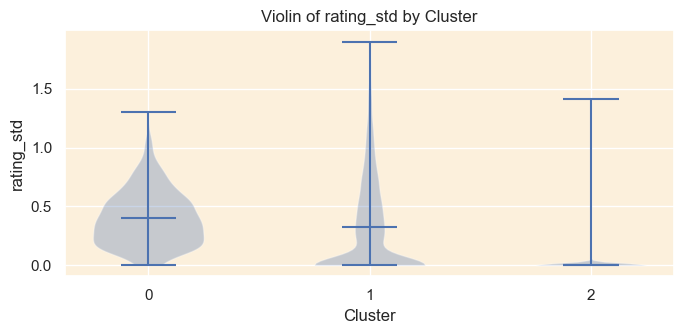

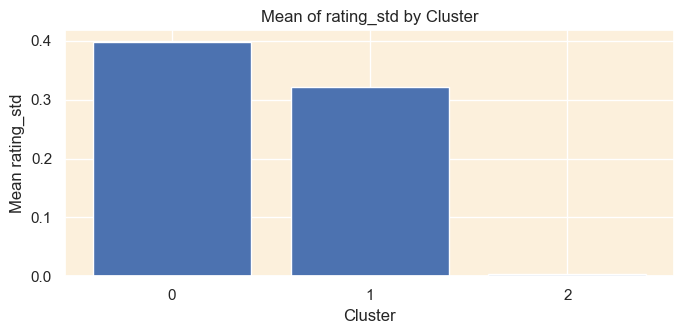

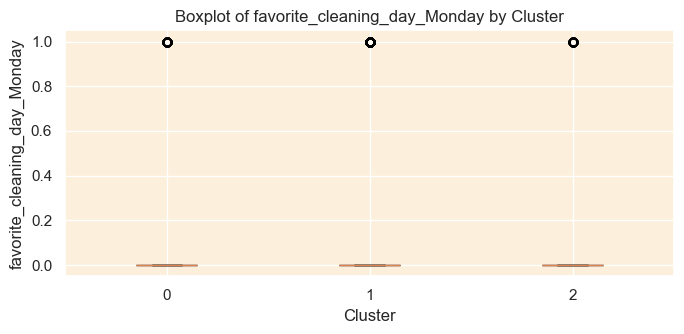

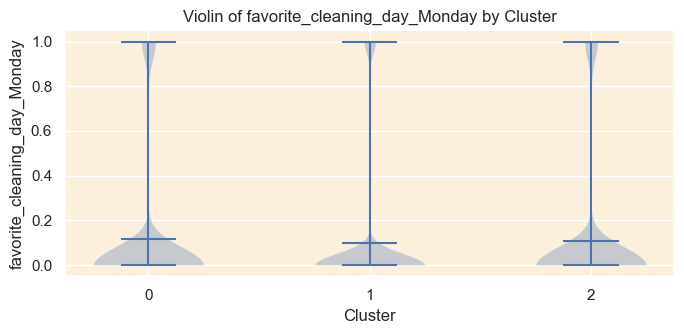

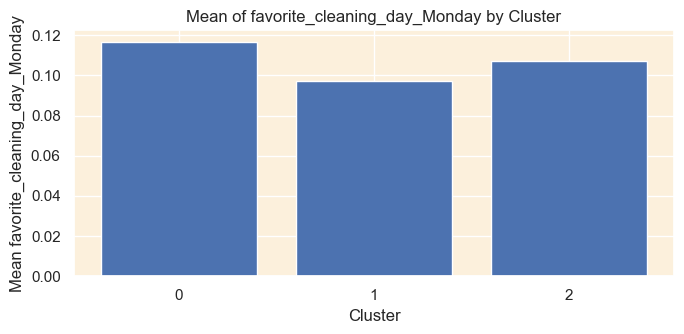

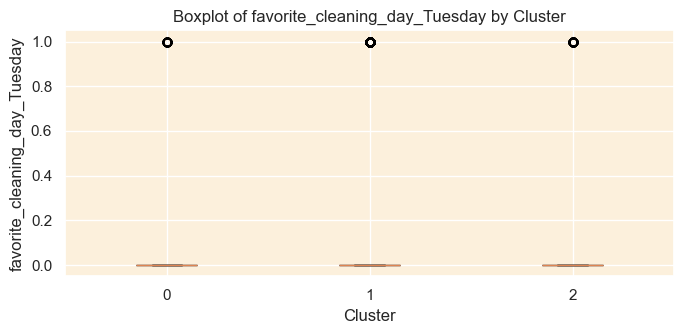

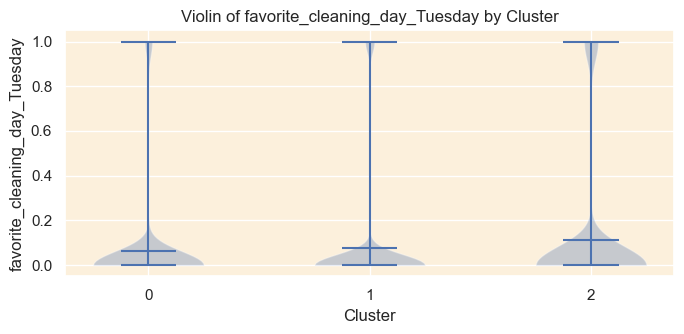

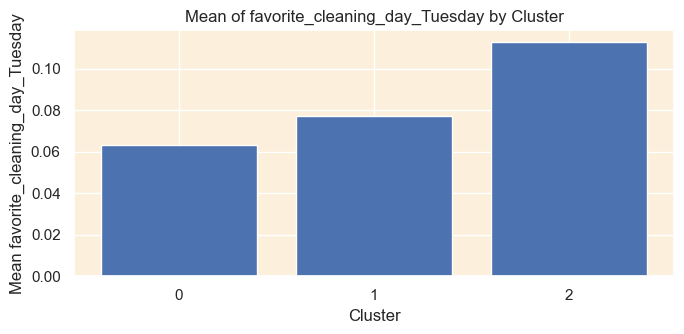

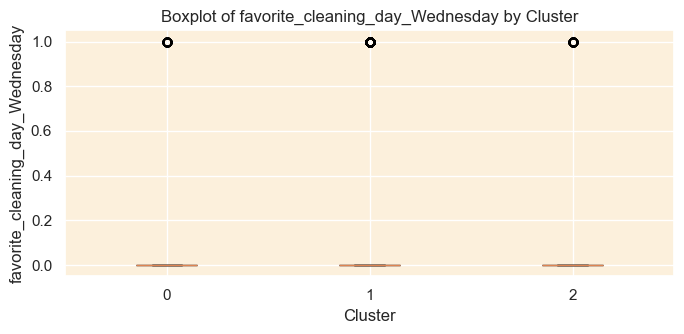

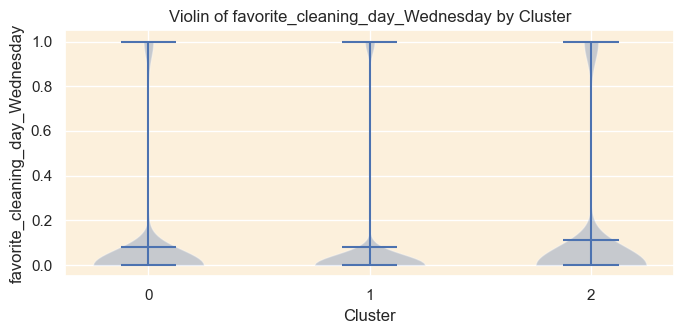

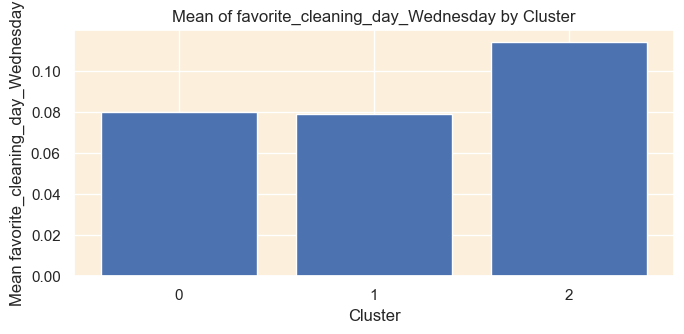

In [52]:
# ----------------------------------------
# Cluster Characteristic Visualization
# ----------------------------------------

FEATURES_TO_PLOT = FEATURES  # consider a subset for speed
#FEATURES_TO_PLOT = ['total_bookings', 'total_service_cancelled', 'avg_rating', 
                    #'total_unique_service', 'favorite_cleaning_hour', 'days_since_last_service',]

for col in FEATURES_TO_PLOT:
    if col not in work.columns: 
        continue
    # Boxplot by cluster
    plt.figure(figsize=(7,3.5))
    data = [work.loc[work["cluster"] == k, col].dropna().values for k in sorted(work["cluster"].unique())]
    plt.boxplot(data, labels=sorted(work["cluster"].unique()), patch_artist=True)
    plt.title(f"Boxplot of {col} by Cluster")
    plt.xlabel("Cluster"); plt.ylabel(col)
    plt.tight_layout(); plt.show()

    # Violin plot by cluster
    plt.figure(figsize=(7,3.5))
    plt.violinplot(dataset=data, showmeans=True, showmedians=False, showextrema=True)
    plt.title(f"Violin of {col} by Cluster")
    plt.xlabel("Cluster"); plt.ylabel(col)
    plt.xticks(ticks=np.arange(1, len(data)+1), labels=sorted(work["cluster"].unique()))
    plt.tight_layout(); plt.show()

    # Per-feature mean bar chart by cluster
    plt.figure(figsize=(7,3.5))
    means = [np.mean(d) if len(d) else np.nan for d in data]
    plt.bar([str(k) for k in sorted(work["cluster"].unique())], means)
    plt.title(f"Mean of {col} by Cluster")
    plt.xlabel("Cluster"); plt.ylabel(f"Mean {col}")
    plt.tight_layout(); plt.show()

<a id="cluster_naming"></a>

<font color=#ffffff>

### <b><span style='color:#ffa705'>Step 16.2 |</span><span style='color:#ffffff'> Cluster Naming (Business Interpretation)</span></b>
⬆️ [Table of Contents](#contents_table)

Assign business-friendly names to clusters based on profiles. Example: *"High Income / Low Hours"*.


In [53]:
# --------------------
# Cluster Naming
# --------------------

unique_clusters = sorted(work["cluster"].unique())
#cluster_name_map = {int(k): f"Cluster {int(k)} — TODO name" for k in unique_clusters if k != -1}
cluster_name_map = {
    0: "Cluster 0 — High Performers",     # ผู้ให้บริการสายลุย งานเยอะ รายได้สูง ขยันมาก
    1: "Cluster 1 — Steady Providers",  # ผู้ให้บริการสายเรื่อย ๆ ทำงานสม่ำเสมอ แต่ไม่หนักเกินไป
    2: "Cluster 2 — Low/Inactive Providers",    # ผู้ให้บริการสายหาย แทบไม่รับงาน
}

if -1 in unique_clusters:
    cluster_name_map[-1] = "Noise / Outliers"

work["cluster_name"] = work["cluster"].map(cluster_name_map)
display(work[[ID_COL, "cluster", "cluster_name"]].head(10))
#print("Edit 'cluster_name_map' above to finalize names.")


,professional_id,cluster,cluster_name
0,5,1,Cluster 1 — Steady Providers
1,6,1,Cluster 1 — Steady Providers
2,7,0,Cluster 0 — High Performers
3,8,1,Cluster 1 — Steady Providers
4,9,1,Cluster 1 — Steady Providers
5,11,1,Cluster 1 — Steady Providers
6,12,1,Cluster 1 — Steady Providers
7,16,1,Cluster 1 — Steady Providers
8,17,1,Cluster 1 — Steady Providers
9,18,1,Cluster 1 — Steady Providers


In [54]:
new_df = feature_means.copy()
new_df['cluster_name'] = new_df.index.map(cluster_name_map)

# Reorder new_df cluster index from 0,1,2 to 1,2,3
new_df_reindexed = new_df.copy()
new_df_reindexed.index = new_df_reindexed.index + 1
new_df_reindexed.index.name = "cluster"

new_df_reindexed[["cluster_name", "total_bookings", "total_service_provided", "avg_rating", "total_income", "total_work_hour", "latest_diff_avg_booking"]]

,cluster_name,total_bookings,total_service_provided,avg_rating,total_income,total_work_hour,latest_diff_avg_booking
cluster,,,,,,,
1,Cluster 0 — High Performers,562.726,554.719,4.898,410792.390,1746.953,-13.558
2,Cluster 1 — Steady Providers,67.339,66.248,4.832,47876.094,204.053,-3.295
3,Cluster 2 — Low/Inactive Providers,2.344,2.289,0.078,1548.241,6.697,-0.007


<a id="export_artifacts"></a>

<font color=#ffffff>

## <b><span style='color:#ffa705'>Step 17 |</span><span style='color:#ffffff'> Export Artifacts</span></b>
⬆️ [Table of Contents](#contents_table)

<a id="export_theory"></a>

<div style="border-radius:10px; padding: 15px; background-color: #10041cff; font-size:100%; text-align:left">

<font color=#ffffff>

### <b>Export Artifacts Theory</b>
Persist cluster assignments and run configuration for reproducibility.

In [63]:
'''
EXPORT_DIR = "outputs"
os.makedirs(EXPORT_DIR, exist_ok=True)

labels_path = os.path.join(EXPORT_DIR, "provider_clusters.csv")
cfg_path = os.path.join(EXPORT_DIR, "run_config.json")

out = work[[ID_COL, "cluster", "cluster_name"]].copy() if "cluster_name" in work.columns else work[[ID_COL, "cluster"]].copy()
out.to_csv(labels_path, index=False)

scaler_name = type(globals().get("scaler", type("NA",(object,),{})()) ).__name__ if "scaler" in globals() else None

config = dict(
    use_mock=USE_MOCK,
    n_samples=N_SAMPLES,
    id_col=ID_COL,
    features=FEATURES,
    scaler=scaler_name,
    apply_pca=APPLY_PCA,
    pca_components=int(PCA_N_COMPONENTS),
    algo=ALGO,
    params=dict(
        k=globals().get("K"),
        gmm_components=globals().get("GMM_COMPONENTS"),
        gmm_cov=globals().get("GMM_COV_TYPE"),
        agglo_n=globals().get("AGGLO_N_CLUSTERS"),
        agglo_linkage=globals().get("AGGLO_LINKAGE"),
        dbscan_eps=globals().get("DBSCAN_EPS"),
        dbscan_min_samples=globals().get("DBSCAN_MIN_SAMPLES"),
        spectral_n=globals().get("SPECTRAL_N_CLUSTERS"),
        spectral_affinity=globals().get("SPECTRAL_AFFINITY"),
    ),
    random_state=RANDOM_STATE
)
with open(cfg_path, "w", encoding="utf-8") as f:
    json.dump(config, f, ensure_ascii=False, indent=2)

print("Saved:", labels_path)
print("Saved:", cfg_path)
'''

'\nEXPORT_DIR = "outputs"\nos.makedirs(EXPORT_DIR, exist_ok=True)\n\nlabels_path = os.path.join(EXPORT_DIR, "provider_clusters.csv")\ncfg_path = os.path.join(EXPORT_DIR, "run_config.json")\n\nout = work[[ID_COL, "cluster", "cluster_name"]].copy() if "cluster_name" in work.columns else work[[ID_COL, "cluster"]].copy()\nout.to_csv(labels_path, index=False)\n\nscaler_name = type(globals().get("scaler", type("NA",(object,),{})()) ).__name__ if "scaler" in globals() else None\n\nconfig = dict(\n    use_mock=USE_MOCK,\n    n_samples=N_SAMPLES,\n    id_col=ID_COL,\n    features=FEATURES,\n    scaler=scaler_name,\n    apply_pca=APPLY_PCA,\n    pca_components=int(PCA_N_COMPONENTS),\n    algo=ALGO,\n    params=dict(\n        k=globals().get("K"),\n        gmm_components=globals().get("GMM_COMPONENTS"),\n        gmm_cov=globals().get("GMM_COV_TYPE"),\n        agglo_n=globals().get("AGGLO_N_CLUSTERS"),\n        agglo_linkage=globals().get("AGGLO_LINKAGE"),\n        dbscan_eps=globals().get("DBSCAN

In [64]:
from joblib import dump

# save
dump(mdl, "best_params.pkl")

['best_params.pkl']